## PDMX data processing

In [ ]:
import sys

from utils import pickle_load, pickle_dump
import os
from tqdm import tqdm
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from glob import glob
import miditoolkit

In [ ]:
train_split = pickle_load('../data_events/data_pdmx_remi+/splits/train_split.pkl')
valid_split = pickle_load('../data_events/data_pdmx_remi+/splits/val_split.pkl')
total_samples = train_split + valid_split
print('number of total samples (before balanced):', len(total_samples))

train_split = pickle_load('../data_events/data_pdmx_remi+_balanced/splits/train_split.pkl')
valid_split = pickle_load('../data_events/data_pdmx_remi+_balanced/splits/val_split.pkl')
total_samples = train_split + valid_split
print('number of total samples (after balanced):', len(total_samples))

train_split_piano = pickle_load('../data_events/data_pdmx_remi+_balanced/splits_piano/train_split.pkl')
valid_split_piano = pickle_load('../data_events/data_pdmx_remi+_balanced/splits_piano/val_split.pkl')
piano_samples = train_split_piano + valid_split_piano
print('number of piano samples (after balanced):', len(piano_samples))

number of total samples (before balanced): 251256
number of total samples (after balanced): 205496
number of piano samples (after balanced): 169885


In [ ]:
def midi2events(file):
    pos, events = pickle_load(file)
    num_notes = sum([1 for i in events if i['name'] == 'Pitch'])
    return 0, len(pos), num_notes

In [ ]:
files = [os.path.join('../data_events/data_pdmx_remi+_balanced', i) for i in piano_samples]
files[0]

from concurrent.futures import ProcessPoolExecutor
with ProcessPoolExecutor(max_workers=16) as executor:
    results = list(tqdm(executor.map(midi2events, files), desc='Preprocess', total=len(files)))
    
avg_bar = sum([i[1] for i in results]) / (len(files))
print('Average number of bars is', avg_bar)

ave_note = sum([i[2] for i in results]) / (len(files))
print('Average number of notes is', ave_note)


Preprocess: 100%|██████████| 169885/169885 [00:20<00:00, 8283.99it/s]


Average number of bars is 35.0184772051682
Average number of notes is 241.96445831003325


In [ ]:
from remiplus.input_representation import InputRepresentation, remi2midi
events = pickle_load('/deepfreeze/jingyue/data/EMOPIA/data_events/Q4_YhXRyOl5pi0_0.pkl')

pm = remi2midi(events[1], has_velocity=True)
# print(pm.instruments[0].notes)
pm.write('/deepfreeze/jingyue/data/PDMX/tmp/Q4_YhXRyOl5pi0_0.mid')

In [ ]:
len(glob('/deepfreeze/jingyue/data/PDMX/data_midi/*/*/*.mid'))

238285

In [ ]:
len(glob('/deepfreeze/jingyue/data/MAESTRO/maestro-v3.0.0/*/*.midi'))

1276

In [ ]:
len(pickle_load('../data_events/data_pdmx_rvq_piano_density/N/L/QmNLf65tX69kbDKg8qxrgasFXPmsgKdmMQKVu7H8JY6165.pkl'))
# len(glob('../data_events/data_pdmx_rvq_piano_density_s512/*/*/*.pkl'))

288

In [ ]:
len(glob('/deepfreeze/jingyue/data/PDMX/PDMX_MIDI/data/*/*/*.mid'))

222820

In [ ]:
len(pickle_load('../data_events/data_pdmx_rvq_piano_density_s512/N/L/QmNLf65tX69kbDKg8qxrgasFXPmsgKdmMQKVu7H8JY6165.pkl'))
# len(glob('../data_events/data_pdmx_rvq_piano_density_s512/*/*/*.pkl'))

288

In [ ]:
import miditoolkit
from miditoolkit.midi import containers
import copy
from data_processing.midi2events import midi2events

events_dir = '/deepfreeze/jingyue/data/tmp'
file = '/deepfreeze/jingyue/data/PDMX/PDMX_MIDI/data/0/0/Qma1cpbgfbA3hqowrs9A8BQjvGuCquMBhaXiUboLv35Ma4.mid'
midi2events(file)


# midi_obj = miditoolkit.midi.parser.MidiFile(file)
# print(midi_obj.tempo_changes)
# print(midi_obj.ticks_per_beat)

# new_midi_obj = copy.deepcopy(midi_obj)
# new_midi_obj.tempo_changes = [new_midi_obj.tempo_changes[0]]

# new_midi_obj.dump('/deepfreeze/jingyue/data/tmp/Qma1a2YHEJ8j9gxLCxgALAfjYaiYJQogh1bgyFSwNSRPCs_test.mid')

(0, 16, 51)

In [ ]:
files = glob('../data_events/data_pdmx_rvq_piano_density_s512/*/*/*.pkl')
for f in tqdm(files):
    try:
        seq = pickle_load(f)
        assert len(seq) % 8 == 0
    except Exception as e:
        print(f)

100%|██████████| 169885/169885 [00:02<00:00, 57765.44it/s]


In [ ]:
import miditoolkit

all_time_sig = defaultdict(int)
for file in tqdm(glob('/deepfreeze/jingyue/data/Hymnal-Folk/midi_quantized_480_split/*.mid')):
    midi_obj = miditoolkit.midi.parser.MidiFile(file)
    
    if len(midi_obj.time_signature_changes) == 1:
        time = midi_obj.time_signature_changes[0]
        all_time_sig[str(time).split(' ')[0]] += 1
    else:
        print(file)
        print(midi_obj.time_signature_changes)
    # assert time.numerator == 4 and time.denominator == 4
    
    assert len(midi_obj.tempo_changes) == 1

all_time_sig

  0%|          | 0/1723 [00:00<?, ?it/s]

100%|██████████| 1723/1723 [00:13<00:00, 131.29it/s]


defaultdict(int,
            {'6/8': 105,
             '3/4': 424,
             '4/4': 1017,
             '3/2': 31,
             '2/4': 46,
             '9/8': 22,
             '2/2': 14,
             '4/2': 5,
             '6/4': 52,
             '9/4': 5,
             '12/8': 2})

In [ ]:
import miditoolkit

all_time_sig = defaultdict(int)
for file in tqdm(glob('/deepfreeze/jingyue/data/Multipianomide-Classic/midi_quantized_480/*.mid')):
    midi_obj = miditoolkit.midi.parser.MidiFile(file)
    tick2time = defaultdict(list)
    for time in midi_obj.time_signature_changes:
        tick2time[time.time].append(time)
        # time_sig.append(str(time)[:3])
        # assert time.numerator == 4 and time.denominator == 4
    if len(list(tick2time.items())) > 1:
        print(file)
        print(tick2time)
    else:
        time_sig = list(tick2time.values())[0][-1]
        all_time_sig[str(time_sig)[:3]] += 1

all_time_sig

In [ ]:
from convert2midi import event_to_midi
from remi2midi import remi2midi
import shutil

pkl_files = glob('/deepfreeze/jingyue/data/PDMX/data_events/1/0/*.pkl')
for file in tqdm(pkl_files[:3]):
    filename = os.path.basename(file)
    print(filename)
    # file = '/deepfreeze/jingyue/data/tmp/Qma1cpbgfbA3hqowrs9A8BQjvGuCquMBhaXiUboLv35Ma4.pkl'
    _, events = pickle_load(file)
    events = ['{}_{}'.format(evs['name'], evs['value']) for evs in events]
    print(events)
    
    remi2midi(events, '/deepfreeze/jingyue/data/tmp/' + filename.replace('.pkl', '_test.mid'), 
                return_first_tempo=True, enforce_tempo=False)


  0%|          | 0/3 [00:00<?, ?it/s]

Qmb1qpVv5aXTsLAp352QVuDqKkXrqJmD1ymmqhb4Z9wMxC.pkl


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

['Bar_None', 'Time_Signature_4/4', 'Beat_36', 'Note_Pitch_69', 'Note_Duration_480', 'Note_Velocity_79', 'Bar_None', 'Time_Signature_4/4', 'Beat_0', 'Note_Pitch_74', 'Note_Duration_960', 'Note_Velocity_79', 'Beat_24', 'Note_Pitch_74', 'Note_Duration_480', 'Note_Velocity_79', 'Beat_36', 'Note_Pitch_74', 'Note_Duration_480', 'Note_Velocity_79', 'Bar_None', 'Time_Signature_4/4', 'Beat_0', 'Note_Pitch_73', 'Note_Duration_720', 'Note_Velocity_79', 'Beat_18', 'Note_Pitch_71', 'Note_Duration_240', 'Note_Velocity_79', 'Beat_24', 'Note_Pitch_69', 'Note_Duration_480', 'Note_Velocity_79', 'Beat_36', 'Note_Pitch_69', 'Note_Duration_480', 'Note_Velocity_79', 'Bar_None', 'Time_Signature_4/4', 'Beat_0', 'Note_Pitch_71', 'Note_Duration_480', 'Note_Velocity_79', 'Beat_12', 'Note_Pitch_73', 'Note_Duration_480', 'Note_Velocity_79', 'Beat_24', 'Note_Pitch_74', 'Note_Duration_480', 'Note_Velocity_79', 'Beat_36', 'Note_Pitch_74', 'Note_Duration_480', 'Note_Velocity_79', 'Bar_None', 'Time_Signature_4/4', 'Bea

In [ ]:
pkl_files = glob('/deepfreeze/jingyue/data/EMOPIA/data_events_figaro/*.pkl')
train_files = []
for file in tqdm(pkl_files):
    filename = os.path.basename(file)
    train_files.append(filename)
    # print(filename)
    pos, events = pickle_load(file)
    events = ['{}_{}'.format(evs['name'], evs['value']) for evs in events]
    # print(events)
    # print(pos)
    

  0%|          | 0/1071 [00:00<?, ?it/s]

100%|██████████| 1071/1071 [00:06<00:00, 176.98it/s]


In [ ]:
import shutil

print(len(glob('/deepfreeze/jingyue/data/Multipianomide-Classic/Multipianomide-Classic/*/*.mid')))
print(len(glob('/deepfreeze/jingyue/data/Multipianomide-Classic/Multipianomide-Classic/format0/*.mid')))

output_dir = '/deepfreeze/jingyue/data/Multipianomide-Classic/midi_quantized'
midi_files = []
for file in tqdm(glob('/deepfreeze/jingyue/data/Multipianomide-Classic/Multipianomide-Classic/*/*.mid')):
    midi_files.append(os.path.basename(file))
midi_files = list(set(midi_files))
print(len(midi_files))

new_files = []
for file in midi_files:
    if 'format0.mid' in file:
        new_files.append(file.replace('_format0.mid', ''))
    else:
        new_files.append(file.replace('.mid', ''))
new_files = list(set(new_files))
print(len(new_files))

    # shutil.copy(file, os.path.join(output_dir, os.path.basename(file)))


585
256


100%|██████████| 585/585 [00:00<00:00, 587282.87it/s]

346
338


In [ ]:
output_dir = '/deepfreeze/jingyue/data/Hymnal-Folk/midi_quantized'
os.makedirs(output_dir, exist_ok=True)
midi_files = glob('/deepfreeze/jingyue/data/Hymnal-Folk/Hymnal-Folk/*/*.mid')
for file in tqdm(midi_files):
    filename = '_'.join(file.split('/')[-2:])
    
    shutil.copy(file, os.path.join(output_dir, filename))
    

  0%|          | 0/1721 [00:00<?, ?it/s]

100%|██████████| 1721/1721 [00:11<00:00, 152.82it/s]


In [ ]:
import shutil

asap_files = glob('/deepfreeze/jingyue/data/ASAP/asap-dataset/Schubert/*/*/midi_score.mid')
output_dir = '/deepfreeze/jingyue/data/ASAP/midi_quantized'
for file in tqdm(asap_files):
    output_path = '_'.join(file.split('/')[6:-1]) + '.mid'
    # shutil.copy(file, os.path.join(output_dir, output_path))

100%|██████████| 12/12 [00:00<00:00, 89877.94it/s]


In [ ]:
midi_files = glob('/deepfreeze/jingyue/data/Ragtime-perfect-Jazz/midi_quantized_480/*.mid')
for file in tqdm(midi_files):
    orig_midi_obj = miditoolkit.midi.parser.MidiFile(file)
    assert orig_midi_obj.ticks_per_beat == 480, f"{orig_midi_obj.ticks_per_beat}"

  0%|          | 2/444 [00:00<00:22, 19.53it/s]

100%|██████████| 444/444 [00:22<00:00, 19.57it/s]


asap_files = glob('/deepfreeze/jingyue/data/ASAP/asap-dataset/Beethoven/*/midi_score.mid')
len(asap_files)

### representation

In [ ]:

def events2events(total_samples):
    old_dir = '../data_events/data_pdmx_remi+/'
    new_dir = '../data_events/data_pdmx_remi+_balanced_simplified/'
    invalid_bar = 0
    invalid_time_sig = 0
    valid_piece = 0
    for piece in tqdm(total_samples):
        old_path = old_dir + piece
        new_path = new_dir + piece
        os.makedirs(new_dir + '/'.join(piece.split('/')[:-1]), exist_ok=True)
        
        pos, events = pickle_load(old_path)
        
        # 1. remove pieces with #bar < 8
        if len(pos) < 8:
            invalid_bar += 1
            continue
        
        # 2. remove pieces with multiple / strange time signatures
        time_sig = list(set([i for i in events if 'Time Signature' in i]))
        if len(time_sig) > 1 or time_sig[0].split('_')[-1] not in ['4/4', '6/8', '2/4', '3/4', '2/2']:
            invalid_time_sig += 1
            continue

        new_events = []
        for i in range(len(events)):
            # 3. remove tempo information
            if ('Position' in events[i] and 'Tempo' in events[i+1]) or ('Tempo' in events[i]):
                continue
            
            # 4. remove velocity information
            if 'Velocity' in events[i]:
                continue
            
            # 5. remove time signature
            if 'Time Signature' in events[i]:
                continue
            
            new_events.append(events[i])
            
        # 5. add EOS_None event
        new_events.append('EOS_None')
        
        new_pos = [i for i in range(len(new_events)) if new_events[i] == 'Bar_None']
        new_events = [{'name': '_'.join(i.split('_')[0:-1]), 'value': i.split('_')[-1]} for i in new_events]
        
        # print(new_pos)
        # print(new_events[:10])
        # input()
        
        pickle_dump((new_pos, new_events), new_path)
        valid_piece += 1
        
    assert valid_piece + invalid_bar + invalid_time_sig == len(total_samples)
    print('Valid piece: {}, invalid bar: {}, invalid time sig: {}'.format(valid_piece, invalid_bar, invalid_time_sig))

# events2events(total_samples)

In [ ]:

def events2events(samples):
    old_dir = '../data_events/data_pdmx_remi+_balanced_simplified/'
    new_dir = '../data_events/data_pdmx_remi+_balanced_simplified_new/'

    for piece in tqdm(samples):
        old_path = old_dir + piece
        new_path = new_dir + piece
        os.makedirs(new_dir + '/'.join(piece.split('/')[:-1]), exist_ok=True)
        
        pos, events = pickle_load(old_path)
        
        new_events = []
        pos2notes = defaultdict(list)
        for i in range(len(events)):
            if events[i]['name'] == 'Bar':
                # add events for last bar
                for p in sorted(list(pos2notes.keys())):
                    new_events.append({'name': 'Position', 'value': p})
                    for note in pos2notes[p]:
                        new_events += note
                        
                # add bar event
                new_events.append(events[i])
                pos2notes = defaultdict(list)
            
            if events[i]['name'] == 'Position':
                pos_value = events[i]['value']
                pos2notes[pos_value].append([events[i+1], events[i+2], events[i+3]])
                # print(events[i+1], events[i+2], events[i+3])
                assert events[i+1]['name'] == 'Instrument'
                assert events[i+2]['name'] in ['Pitch', 'Pitch_drum']
                assert events[i+3]['name'] == 'Duration'

            if events[i]['name'] == 'EOS':
                new_events.append(events[i])
        
        new_pos = [i for i in range(len(new_events)) if new_events[i]['name'] == 'Bar']
        assert len(pos) == len(new_pos)
        assert len(events) >= len(new_events)
        
        # print(new_pos)
        # print(pos)
        # print(new_events[:30])
        # print(events[:30])
        
        pickle_dump((new_pos, new_events), new_path)

events2events(total_samples)

100%|██████████| 205496/205496 [06:26<00:00, 531.11it/s]


### vocabulary

In [ ]:
def vocab_simplify(pdmx_vocab):
    event2idx, idx2event = pdmx_vocab
    new_vocab = []
    for v in event2idx:
        if 'Velocity' in v or 'Tempo' in v:
            continue
        
        if 'Position' in v and int(v.split('_')[1]) > 47:
            continue
        
        # if 'Time Signature' in v and v.split('_')[1] not in ['4/4', '6/8', '2/4', '3/4', '2/2']:
        if 'Time Signature' in v:
            continue
        
        if v in ['<pad>', '<unk>', '<bos>', '<eos>', '<mask>']:
            continue
        
        new_vocab.append(v)
    new_vocab.append('EOS_None')
    
    new_event2idx = {new_vocab[idx]:idx for idx in range(len(new_vocab))}
    new_idx2event = {idx:new_vocab[idx] for idx in range(len(new_vocab))}
    print(len(new_vocab))
    # print(new_event2idx)
    
    pickle_dump((new_event2idx, new_idx2event), '../data_events/data_pdmx_remi+_balanced_simplified/dictionary.pkl')

# vocab_simplify(pdmx_vocab)

In [ ]:
pdmx_vocab = pickle_load('../data_events/data_pdmx_remi+/dictionary.pkl')
print(len(pdmx_vocab[0]))

pdmx_vocab = pickle_load('../data_events/data_pdmx_remi+_balanced/dictionary.pkl')
print(len(pdmx_vocab[0]))

pdmx_vocab = pickle_load('../data_events/data_pdmx_remi+_balanced_simplified/dictionary.pkl')
print(len(pdmx_vocab[0]))


749
498
493


In [ ]:
vocab_type = set([v.split('_')[0] for v in pdmx_vocab[0]])
vocab_type

{'Bar', 'Duration', 'EOS', 'Instrument', 'Pitch', 'Position'}

### data split

In [ ]:
def data_split(samples):
    i = 0
    time2piece = defaultdict(list)
    for piece in tqdm(samples):
        piece_path = '../data_events/data_pdmx_remi+_balanced/' + piece
        if os.path.exists(piece_path):
            i += 1
            
            time_sig = pickle_load(piece_path)[1][1]['value']
            time2piece[time_sig].append(piece)

    # time2piece = pickle_load('../data_events/data_pdmx_remi+_balanced_simplified/timeSig2pieces.pkl')

    for t in time2piece:
        print(t, time2piece[t][:3])

    train_pieces = []
    valid_pieces = []
    time2piece_train = {}
    for time_sig in time2piece:
        pieces = time2piece[time_sig]
        train_set, valid_set = train_test_split(pieces, test_size=0.1, random_state=42)
        train_pieces += train_set
        valid_pieces += valid_set
        time2piece_train[time_sig] = train_set
        # print(time_sig)
        # print(pickle_load('../data_events/data_pdmx_remi+_balanced/' + time2piece_train[time_sig][0])[1][1]['value'])
        
    pickle_dump(train_pieces, '../data_events/data_pdmx_remi+_balanced/splits/train_split.pkl')
    pickle_dump(valid_pieces, '../data_events/data_pdmx_remi+_balanced/splits/val_split.pkl')
    pickle_dump(time2piece_train, '../data_events/data_pdmx_remi+_balanced/timeSig2pieces.pkl')
    print(len(train_pieces), len(valid_pieces))
    print(train_pieces[0])
    
data_split(total_samples)


100%|██████████| 251256/251256 [01:23<00:00, 3026.64it/s]


3/4 ['U/a/QmUasoFp2r7WcWRc3WoTtpU6J3GPL16Wq4nLuYSuD6rBSZ.pkl', 'U/a/QmUaBEeF79UkrzgRwrD8eyubWhTdxvWrb2YX8kktZJDsMk.pkl', 'U/a/QmUa4ZPsVvLxkybPQzdQ2cZtLoJuw2ny6noiXM4eTzpRWP.pkl']
6/8 ['U/a/QmUaMmAcLYoUiWLu6xGn44kiR4woSMCqKPxbNeCyb1mHhG.pkl', 'U/a/QmUaCMCNkfPF2RENbNUAJVVsWg3gEzvuQwUYuq679jB9gM.pkl', 'U/a/QmUaCCninVkmusJPrc4DztwQnpt1N8VrRwyZswS1dgKyzM.pkl']
4/4 ['U/a/QmUa6Hi7xGEH5y8iYwh3H8HXu5pLbNeBQ34gs3kseKTe21.pkl', 'U/a/QmUamXrDqKS6Pt3EqAJihftLxAvoq5T4TnmydpGLBMJXxE.pkl', 'U/a/QmUabAQGpfmMC1HrL9LWhEgehBd13pN9KPKZYqV3VHF74s.pkl']
2/2 ['U/a/QmUaiQqB4cBnQBh9KrkN6FLZyCGp6cREEWsuvquhyWysa8.pkl', 'U/a/QmUaRCrK9u5Y5p287nbKFez5Z9ZU26WpSSU2ePRRMTKAp3.pkl', 'U/a/QmUaLKSYzEUU5cqZrBZxgAoZ18brmHoij5UKt2UXDhE1yR.pkl']
2/4 ['U/a/QmUaMYfUz6j7Nm7kVkfTk783ZzZpMn5mfHuaPDuUsGEwXk.pkl', 'U/a/QmUafTHCF7Xdjj1skreo4e7Ub43k4j7JejAgrSzss45Wyr.pkl', 'U/a/QmUaA7SJsXnLp1jpCLDQBU6gkSPP55jpZWFwD78qB1EbrZ.pkl']
184944 20552
e/5/Qme5f1Q78LR9tbDimGh6ViMPBafvrofERAG7Cx4wiv1Moa.pkl


### data representation example

In [ ]:
pdmx_sample = pickle_load('../data_events/data_pdmx_remi+/a/1/Qma1a2YHEJ8j9gxLCxgALAfjYaiYJQogh1bgyFSwNSRPCs.pkl')
print(pdmx_sample[0][:10], '\n', pdmx_sample[1][:10], '\n', pdmx_sample[1][-10:])

[0, 44, 98, 177, 236, 320, 399, 438, 497, 536] 
 ['Bar_None', 'Time Signature_4/4', 'Position_0', 'Tempo_8', 'Position_0', 'Instrument_Acoustic Grand Piano', 'Pitch_63', 'Velocity_20', 'Duration_11', 'Position_12'] 
 ['Position_23', 'Instrument_Acoustic Grand Piano', 'Pitch_51', 'Velocity_20', 'Duration_11', 'Position_35', 'Instrument_Acoustic Grand Piano', 'Pitch_46', 'Velocity_20', 'Duration_11']


In [ ]:
# remove pieces with #bar < 8, invalid time signature
# remove velocity, tempo events

pdmx_sample = pickle_load('../data_events/data_pdmx_remi+_balanced/a/1/Qma1a2YHEJ8j9gxLCxgALAfjYaiYJQogh1bgyFSwNSRPCs.pkl')
print(pdmx_sample[0][:10], '\n', pdmx_sample[1][:10], '\n', pdmx_sample[1][-10:])

[0, 34, 76, 138, 184, 250, 312, 342, 388, 418] 
 [{'name': 'Bar', 'value': 'None'}, {'name': 'Time Signature', 'value': '4/4'}, {'name': 'Position', 'value': '0'}, {'name': 'Instrument', 'value': 'Acoustic Grand Piano'}, {'name': 'Pitch', 'value': '63'}, {'name': 'Duration', 'value': '11'}, {'name': 'Position', 'value': '12'}, {'name': 'Instrument', 'value': 'Acoustic Grand Piano'}, {'name': 'Pitch', 'value': '63'}, {'name': 'Duration', 'value': '11'}] 
 [{'name': 'Duration', 'value': '11'}, {'name': 'Position', 'value': '23'}, {'name': 'Instrument', 'value': 'Acoustic Grand Piano'}, {'name': 'Pitch', 'value': '51'}, {'name': 'Duration', 'value': '11'}, {'name': 'Position', 'value': '35'}, {'name': 'Instrument', 'value': 'Acoustic Grand Piano'}, {'name': 'Pitch', 'value': '46'}, {'name': 'Duration', 'value': '11'}, {'name': 'EOS', 'value': 'None'}]


In [ ]:
# remove pieces with #bar < 8, invalid time signature
# remove velocity, tempo events, time signature

pdmx_sample = pickle_load('../data_events/data_pdmx_remi+_balanced_simplified/a/1/Qma1a2YHEJ8j9gxLCxgALAfjYaiYJQogh1bgyFSwNSRPCs.pkl')
print(pdmx_sample[0][:10], '\n', pdmx_sample[1][:10], '\n', pdmx_sample[1][-10:])

[0, 33, 74, 135, 180, 245, 306, 335, 380, 409] 
 [{'name': 'Bar', 'value': 'None'}, {'name': 'Position', 'value': '0'}, {'name': 'Instrument', 'value': 'Acoustic Grand Piano'}, {'name': 'Pitch', 'value': '63'}, {'name': 'Duration', 'value': '11'}, {'name': 'Position', 'value': '12'}, {'name': 'Instrument', 'value': 'Acoustic Grand Piano'}, {'name': 'Pitch', 'value': '63'}, {'name': 'Duration', 'value': '11'}, {'name': 'Position', 'value': '24'}] 
 [{'name': 'Duration', 'value': '11'}, {'name': 'Position', 'value': '23'}, {'name': 'Instrument', 'value': 'Acoustic Grand Piano'}, {'name': 'Pitch', 'value': '51'}, {'name': 'Duration', 'value': '11'}, {'name': 'Position', 'value': '35'}, {'name': 'Instrument', 'value': 'Acoustic Grand Piano'}, {'name': 'Pitch', 'value': '46'}, {'name': 'Duration', 'value': '11'}, {'name': 'EOS', 'value': 'None'}]


### statistics (tempo, velocity, time signature)

In [ ]:
def pdmx_statistics(total_samples):
    num_bar = defaultdict(int)

    num_time_sig = defaultdict(int)
    num_time_changes = 0
    num_time_none = 0

    num_tempo = defaultdict(int)
    num_tempo_changes = 0
    num_tempo_none = 0

    num_velocity = defaultdict(int)
    num_velo_changes = 0
    num_velo_none = 0

    for piece in tqdm(total_samples):
        path = '../data_events/data_pdmx_remi+/' + piece
        pos, events = pickle_load(path)
        
        num_bar[len(pos)] += 1
        
        time_sigs = list(set([i for i in events if 'Time Signature' in i]))
        if len(time_sigs) > 1:
            num_time_changes += 1
        elif len(time_sigs) == 1:
            num_time_sig[time_sigs[0]] += 1
        else:
            num_time_none += 1
        
        tempos = list(set([i for i in events if 'Tempo' in i]))
        if len(tempos) > 1:
            num_tempo_changes += 1
        elif len(tempos) == 1:
            num_tempo[tempos[0]] += 1
        else:
            num_tempo_none += 1
            
        velocities = list(set([i for i in events if 'Velocity' in i]))
        if len(velocities) > 1:
            num_velo_changes += 1
        elif len(velocities) == 1:
            num_velocity[velocities[0]] += 1
        else:
            num_velo_none += 1
            
    print('[info] Bar')
    print(sorted(num_bar.items(), key=lambda x:x[0]))
    print()

    print('[info] Time Signature')
    print(num_time_sig)
    print('# time changes', num_time_changes)
    print('# time none', num_time_none)
    print()

    print('[info] Tempo')
    print(num_tempo)
    print('# tempo changes', num_tempo_changes)
    print('# tempo none', num_tempo_none)
    print()

    print('[info] Velocity')
    print(num_velocity)
    print('# velocity changes', num_velo_changes)
    print('# velocity none', num_velo_none)
    print()

pdmx_statistics(total_samples)

100%|██████████| 251256/251256 [02:37<00:00, 1595.27it/s]

[info] Bar
[(1, 91), (2, 257), (3, 273), (4, 697), (5, 485), (6, 373), (7, 418), (8, 3400), (9, 3705), (10, 1561), (11, 1087), (12, 2826), (13, 1887), (14, 2270), (15, 2240), (16, 21444), (17, 10994), (18, 12227), (19, 7217), (20, 8748), (21, 2056), (22, 1768), (23, 1307), (24, 7395), (25, 3290), (26, 2942), (27, 2823), (28, 4066), (29, 1208), (30, 1883), (31, 1469), (32, 22237), (33, 5551), (34, 6910), (35, 3619), (36, 24174), (37, 1420), (38, 1647), (39, 1126), (40, 5955), (41, 1216), (42, 1359), (43, 1033), (44, 1708), (45, 4535), (46, 916), (47, 863), (48, 3798), (49, 1220), (50, 1278), (51, 839), (52, 1992), (53, 789), (54, 2091), (55, 552), (56, 1159), (57, 707), (58, 716), (59, 548), (60, 793), (61, 660), (62, 614), (63, 602), (64, 2173), (65, 1069), (66, 924), (67, 598), (68, 1217), (69, 515), (70, 750), (71, 553), (72, 1925), (73, 519), (74, 507), (75, 374), (76, 585), (77, 419), (78, 439), (79, 384), (80, 815), (81, 760), (82, 447), (83, 376), (84, 513), (85, 402), (86, 383),

### note density

In [ ]:
def compute_note_density(samples):
    monophonic = []
    polyphonic = []
    all_note_density = []
    all_event_density = []

    for sample in tqdm(samples):
        sample_path = '../data_events/data_pdmx_remi+_balanced/' + sample
        pos, events = pickle_load(sample_path)
        # events = ['{}_{}'.format(evs['name'], evs['value']) for evs in events]
        note_number = defaultdict(int)
        bar = 0
        for evs in events:
            if evs['name'] == 'Bar':
                bar += 1
            if evs['name'] == 'Position':
                note_number["bar{}_pos{}".format(bar, evs['value'])] += 1
        # print(note_number)
        note_density = sum([note_number[i] for i in note_number]) / len(note_number)
        
        all_note_density.append(note_density)
        if note_density < 2:
            monophonic.append(sample)
        elif note_density >= 2:
            polyphonic.append(sample)

        event_density = len(events) / len(pos)
        all_event_density.append(event_density)
        
    print(len(monophonic), len(polyphonic))
    return monophonic, polyphonic

# monophonic_train, polyphonic_train = compute_note_density(train_split_piano)
monophonic_valid, polyphonic_valid = compute_note_density(valid_split_piano)

100%|██████████| 16992/16992 [00:12<00:00, 1347.36it/s]

14474 2518


In [ ]:
density2pieces = {'monophonic': monophonic_valid, 'polyphonic': polyphonic_valid}
path = '../data_events/data_pdmx_remi+_balanced_simplified/density2pieces_piano_valid.pkl'
pickle_dump(density2pieces, path)

In [ ]:
density2pieces = {'monophonic': monophonic_train, 'polyphonic': polyphonic_train}
path = '../data_events/data_pdmx_remi+_balanced/density2pieces_piano.pkl'
pickle_dump(density2pieces, path)

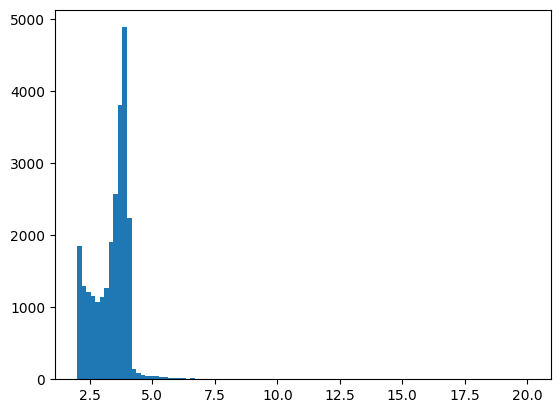

In [ ]:
selected_note_density = [i for i in all_note_density if i >= 2]
plt.hist(selected_note_density, bins=100)
plt.show()

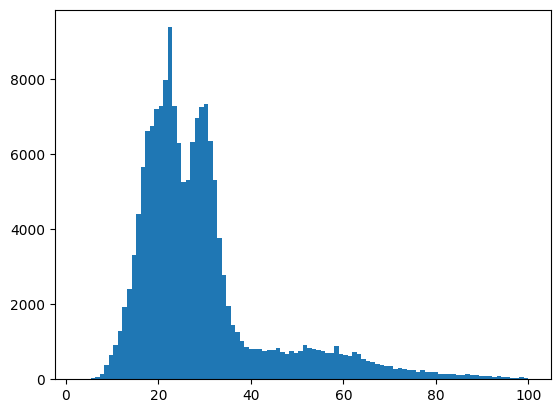

In [ ]:
selected_event_density = [i for i in all_event_density if i < 100]
plt.hist(selected_event_density, bins=100)
plt.show()

100%|██████████| 169885/169885 [00:42<00:00, 3966.47it/s]


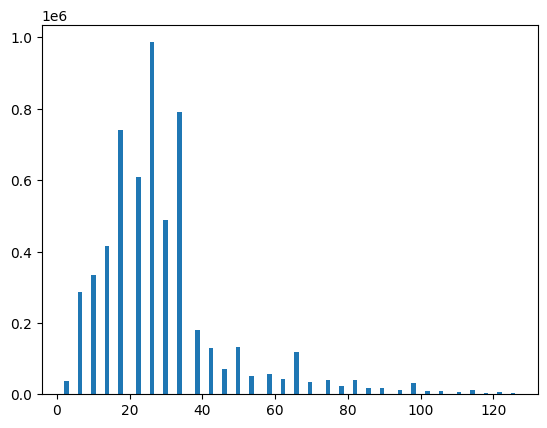

In [ ]:
lengths = []
longer = []
for sample in tqdm(piano_samples):
    sample_path = '../data_events/data_pdmx_remi+_balanced/' + sample
    pos, events = pickle_load(sample_path)
    
    for b, (st, ed) in enumerate(zip(pos[:-1], pos[1:])):
        if ed - st > 128:
            longer.append(ed - st)
        else:
            lengths.append(ed - st)
        
plt.hist(lengths, bins=100)
plt.show()

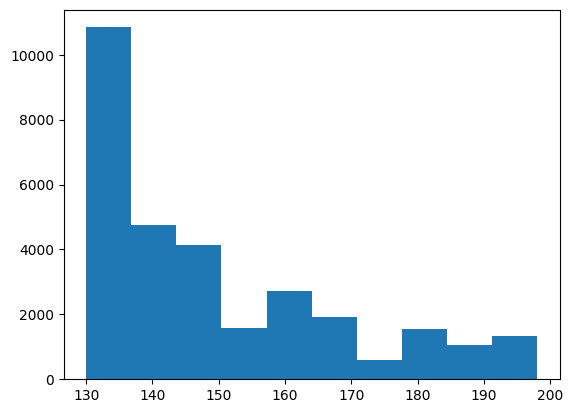

In [ ]:
plt.hist([i for i in longer if i < 200])
plt.show()

### json2midi

In [ ]:
json_data_path = '/deepfreeze/jingyue/PDMX/data_json'
len(glob(os.path.join(json_data_path, '*/*/*.json')))

254077

In [ ]:
json_data_path = '/home/jingyue/data/PDMX/data_json'
len(glob(os.path.join(json_data_path, '*/*/*.json')))

254077

In [ ]:
import os
import multiprocessing
from tqdm import tqdm

from pdmx import load
from pdmx.reading.read_musescore import read_musescore
from pdmx.reading.output import write_midi

# dir_path = '../data/PDMX/data_json'
# dir_path = '/deepfreeze/jingyue/PDMX/data_json'
dir_path = '../data/PDMX/data_mscz_254k'
midi_path = '../data/PDMX/data_midi_PDMX_v3'

sub_dir_list = [os.path.join(dir_path, sub_dir) for sub_dir in os.listdir(dir_path)]
print(sub_dir_list)

def json2midi(sub_dir_path):
    all_score = 0
    good_score = 0
    bad_score = 0
    piano_score = 0

    error_list = []
    
    for sub_sub_dir in tqdm(os.listdir(sub_dir_path)):
        sub_sub_dir_path = os.path.join(sub_dir_path, sub_sub_dir)

        sub_sub_midi_path = sub_sub_dir_path.replace('mscz_254k', 'midi_PDMX_v3')
        os.makedirs(sub_sub_midi_path, exist_ok=True)

        for f in os.listdir(sub_sub_dir_path)[:100]:
            if '.mscz' not in f:
                continue
            all_score += 1

            score_name = f.split('.')[0]
            score_path = os.path.join(sub_sub_dir_path, f)
            midi_path = os.path.join(sub_sub_midi_path, score_name + '.mid')

            try:
                # music = load(path = score_path)
                # music.write(path = midi_path)
                score = read_musescore(path=score_path, timeout=20)
                midi = write_midi(path=midi_path, music=score)
            except Exception as e:
                error_list.append(e)
                bad_score += 1
                continue

            good_score += 1

    print(sub_dir_path)
    print('Good: {}/{}'.format(good_score, all_score), good_score / all_score)
    print('Piano: {}/{}'.format(piano_score, all_score), piano_score / all_score)
    print('Bad: {}/{}'.format(bad_score, all_score), bad_score / all_score)
    print(list(set(error_list)))
    
    return all_score, good_score, bad_score


['../data/PDMX/data_mscz_254k/U', '../data/PDMX/data_mscz_254k/e', '../data/PDMX/data_mscz_254k/T', '../data/PDMX/data_mscz_254k/Z', '../data/PDMX/data_mscz_254k/S', '../data/PDMX/data_mscz_254k/R', '../data/PDMX/data_mscz_254k/c', '../data/PDMX/data_mscz_254k/Y', '../data/PDMX/data_mscz_254k/d', '../data/PDMX/data_mscz_254k/P', '../data/PDMX/data_mscz_254k/X', '../data/PDMX/data_mscz_254k/N', '../data/PDMX/data_mscz_254k/W', '../data/PDMX/data_mscz_254k/Q', '../data/PDMX/data_mscz_254k/a', '../data/PDMX/data_mscz_254k/V', '../data/PDMX/data_mscz_254k/b', '../data/PDMX/data_mscz_254k/f']


In [ ]:
with multiprocessing.Pool(processes = int(multiprocessing.cpu_count() / 4)) as pool:
    results = list(pool.map(func = json2midi, iterable = tqdm(iterable = sub_dir_list, desc = f"json2midi", total = len(sub_dir_list)), chunksize = 1))

print("=========== Final Results ===========")
total_score = sum([i[0] for i in results])
total_good_score = sum([i[1] for i in results])
total_bad_score = sum([i[2] for i in results])
print('Good: {}/{}'.format(total_good_score, total_score), total_good_score / total_score)
print('Bad: {}/{}'.format(total_bad_score, total_score), total_bad_score / total_score)

In [ ]:
import glob
len(glob.glob('*/*/*.mid', root_dir='../data/PDMX/data_midi_PDMX_v2', recursive=True, ))
len(glob.glob('*/*/*.mscz', root_dir='../data/PDMX/data_mscz_254k', recursive=True, ))

254077

### MSCZ2MIDI (mscore)

In [ ]:
import glob
from tqdm import tqdm
import os
import json

data_dirs = os.listdir('../data/PDMX/data_mscz_254k')
print(data_dirs)
total_count = 0

for d in data_dirs:
    job_list = []
    mscz_files = glob.glob('{}/*/*.mscz'.format(d), root_dir='../data/PDMX/data_mscz_254k', recursive=True)
    print(len(mscz_files))
    total_count += len(mscz_files)

    # job_orders = []
    for file in tqdm(mscz_files):
        input_path = 'data_mscz_254k/' + file
        # if file[:3] not in job_orders:
        #     job_orders.append(file[:3])
        output_path = 'data_midi_254k/' + file.replace('.mscz', '.mid')
        job_list.append({'in': input_path, 'out': output_path})

    with open('jobs/job_{}.json'.format(d), 'w') as f:
        json.dump(job_list, f)

total_count

['U', 'e', 'T', 'Z', 'S', 'R', 'c', 'Y', 'd', 'P', 'X', 'N', 'W', 'Q', 'a', 'V', 'b', 'f']
14763


100%|██████████| 14763/14763 [00:00<00:00, 1466025.28it/s]


14881


100%|██████████| 14881/14881 [00:00<00:00, 1478443.23it/s]


14645


100%|██████████| 14645/14645 [00:00<00:00, 1458277.91it/s]


14767


100%|██████████| 14767/14767 [00:00<00:00, 1507540.15it/s]


14738


100%|██████████| 14738/14738 [00:00<00:00, 1499179.11it/s]


14521


100%|██████████| 14521/14521 [00:00<00:00, 1479078.35it/s]


14716


100%|██████████| 14716/14716 [00:00<00:00, 1471390.92it/s]


14732


100%|██████████| 14732/14732 [00:00<00:00, 1503345.01it/s]


14736


100%|██████████| 14736/14736 [00:00<00:00, 1473355.51it/s]


14789


100%|██████████| 14789/14789 [00:00<00:00, 1442917.07it/s]


14724


100%|██████████| 14724/14724 [00:00<00:00, 1463711.89it/s]


9777


100%|██████████| 9777/9777 [00:00<00:00, 1462993.59it/s]


14812


100%|██████████| 14812/14812 [00:00<00:00, 1468631.05it/s]


14790


100%|██████████| 14790/14790 [00:00<00:00, 1461750.23it/s]


14875


100%|██████████| 14875/14875 [00:00<00:00, 1438790.49it/s]


14692


100%|██████████| 14692/14692 [00:00<00:00, 1467452.06it/s]


14691


100%|██████████| 14691/14691 [00:00<00:00, 1480395.94it/s]


8428


100%|██████████| 8428/8428 [00:00<00:00, 1494697.43it/s]


254077

### XML2MIDI (music21)

In [ ]:
from music21 import converter, midi
from glob import glob
import multiprocessing
import os
from tqdm import tqdm
from utils import pickle_dump
import warnings
warnings.filterwarnings('ignore')

def xml2midi(dir):
    files = glob(os.path.join('/deepfreeze/jingyue/PDMX/data_mxl', '{}/*/*.mxl'.format(dir)))
    # print(len(files))
    
    total_files = 0
    good_files = 0
    error_files = []

    for f in tqdm(files):
        if '.mxl' not in f:
            continue
        total_files += 1
        midi_dir = os.path.dirname(f).replace('data_mxl', 'data_midi')
        os.makedirs(midi_dir, exist_ok=True)
        
        midi_path = os.path.join(midi_dir, f.split('/')[-1].replace('.mxl', '.mid'))
        # Add each part to the combined MIDI stream

        try:
            score = converter.parse(f)
            
            combined_midi = midi.MidiFile()
            for part in score.parts:
                mf = midi.translate.streamToMidiFile(part)
                for track in mf.tracks:
                    combined_midi.tracks.append(track)
            combined_midi.open(midi_path, 'wb')
            combined_midi.write()
            combined_midi.close()
            
            good_files += 1
        except Exception as e:
            # print(f"Error processing {f}: {e}")
            error_files.append(f)
        
    return total_files, good_files, len(error_files), error_files


In [ ]:
dir_list = os.listdir('/deepfreeze/jingyue/PDMX/data_mxl')
print(dir_list)

with multiprocessing.Pool(processes = int(multiprocessing.cpu_count() / 4)) as pool:
    results = list(pool.map(func = xml2midi, iterable = tqdm(iterable = dir_list, desc = f"json2midi", total = len(dir_list)), chunksize = 1))

print("=========== Final Results ===========")
total_score = sum([i[0] for i in results])
total_good_score = sum([i[1] for i in results])
total_bad_score = sum([i[2] for i in results])
print('Good: {}/{}'.format(total_good_score, total_score), total_good_score / total_score)
print('Bad: {}/{}'.format(total_bad_score, total_score), total_bad_score / total_score)

error_files = []
for i in results:
    error_files += results[3]
pickle_dump(error_files)

### midi2REMI+

In [ ]:
from remiplus.input_representation import InputRepresentation, remi2midi
from remiplus.vocab import RemiVocab, Tokens
from concurrent.futures import ProcessPoolExecutor

In [ ]:
from remiplus.input_representation import InputRepresentation, remi2midi
from remiplus.vocab import RemiVocab, Tokens
from concurrent.futures import ProcessPoolExecutor

file = '/home/jingyue/figaro/test.mid'
data_dir = '../data_events/data_pdmx_remi+/'
rep = InputRepresentation(file, strict=True, do_extract_chords=False)
events = rep.get_remi_events()
new_events = [{'name': e.split('_')[0], 'value': e.split('_')[1]} for e in events]
bar_pos = [i for i, v in enumerate(events) if 'Bar' in v]
vocab = RemiVocab()

def midi2events(file):
    try:
        rep = InputRepresentation(file, strict=True, do_extract_chords=False)
        events = rep.get_remi_events()
        new_events = [{'name': e.split('_')[0], 'value': e.split('_')[1]} for e in events]
        seq = vocab.encode(events)
        unk = np.where(np.array(seq) == 1)[0]
        if len(unk) > 0:
            for i in unk:
                if 'Time Signature' in events[i]:
                    return 1
                print(events[i])
        assert len(events) == len(new_events)
        bar_pos = [i for i, v in enumerate(events) if 'Bar' in v]

        output_path = file.replace('../PDMX/data/data_midi_PDMX', '../data_events/data_pdmx_remi+').replace('mid', 'pkl')
        output_dir = '/'.join(output_path.split('/')[:-1])
        os.makedirs(output_dir, exist_ok=True)
        pickle_dump((bar_pos, events), output_path)
    except Exception:
        return 1

    return 0

files = glob('../PDMX/data/data_midi_PDMX/*/*/*.mid', recursive=True)
print('# midi files', len(files))

with ProcessPoolExecutor(max_workers=16) as executor:
    results = list(tqdm(executor.map(midi2events, files), desc='Preprocess', total=len(files)))

discards = round(100*sum(results)/float(len(files)),2)
print(f'Successfully processed {len(files) - sum(results)} files (discarded {discards}%)')


In [ ]:
data_dir = '/deepfreeze/jingyue/PDMX/tmp'
for f in os.listdir(data_dir):
    if '.mid' not in f:
        continue
    if '_test.mid' in f:
        continue
    file_path = os.path.join(data_dir, f)
    out_path = os.path.join(data_dir, f.split('.')[0] + '_test.mid')

    rep = InputRepresentation(file_path, strict=True, do_extract_chords=False)
    events = rep.get_remi_events()
    print(events[:10])
    
    pm = remi2midi(events, bpm=120, has_velocity=True)
    print(pm.instruments[0].notes)
    pm.write(out_path)

### event2midi

In [ ]:
from remiplus.input_representation import remi2midi

id = 1

train_samples = pickle_load('../data_events/data_pdmx_remi+_balanced/splits_piano/train_split.pkl')
pdmx_sample = pickle_load('../data_events/data_pdmx_remi+_balanced/' + train_samples[id])
print(train_samples[id])
pos, events = pdmx_sample
events[0]

out_file = 'tmp/test5'
events = ['{}_{}'.format(e['name'], str(e['value'])) for e in events]
pm = remi2midi(events, bpm=120, has_velocity=False)
pm.write(out_file + '.mid')

Y/m/QmYmxudoubsndA8fJEesQ2TQLzHHGkxEKSsHPuboeNnqtR.pkl


In [ ]:
from pdmx import load

json_path = '../PDMX/data/data_json/Y/m/QmYmxudoubsndA8fJEesQ2TQLzHHGkxEKSsHPuboeNnqtR.json'
mid_path = 'tmp/midi2.mid'
music = load(path = json_path)
music.write(path = mid_path)


### Check piano pieces (PDMX)

In [ ]:
from utils import load_txt
import miditoolkit
import shutil
from concurrent.futures import ProcessPoolExecutor

piano_pieces = load_txt('/home/jingyue/PDMX/metadata/piano_score_midi_PDMX.txt')
piano_pieces = [os.path.basename(p) for p in piano_pieces]

midi_pieces = glob('/deepfreeze/jingyue/data/PDMX/PDMX_MIDI/data/*/*/*.mid', recursive=True)
print(len(midi_pieces))
output_path = '/deepfreeze/jingyue/data/PDMX/data_midi_piano'
os.makedirs(output_path, exist_ok=True)

def dump_piano_piece(piece):
    is_piano = True
    filename = os.path.basename(piece)
    if filename in piano_pieces:
        try:
            midi_obj = miditoolkit.midi.parser.MidiFile(piece)
        except:
            return 1
        
        for instrument in midi_obj.instruments:
            if instrument.program != 0:
                is_piano = False

        if is_piano:
            file_subdir = '/'.join(piece.split('/')[-3:-1])
            os.makedirs(os.path.join(output_path, file_subdir), exist_ok=True)
            shutil.copy(piece, os.path.join(output_path, file_subdir, filename))
            return 0
        
    return 1

with ProcessPoolExecutor(max_workers=16) as executor:
    results = list(tqdm(executor.map(dump_piano_piece, midi_pieces), desc='Preprocess', total=len(midi_pieces)))
    
bad_files = sum(results)
discards = round(100*bad_files / float(len(midi_pieces)),2)
print(f'Successfully processed {len(midi_pieces) - bad_files} files (discarded {discards}%)')

222820


Preprocess: 100%|██████████| 222820/222820 [09:41<00:00, 383.41it/s]


Successfully processed 183417 files (discarded 17.68%)


In [ ]:
len(glob('/deepfreeze/jingyue/data/PDMX/data_midi_piano_split/*/*/*.mid'))

206362

In [ ]:
len(glob('/deepfreeze/jingyue/data/PDMX/data_events_timeLast/*/*/*.pkl'))

201174

In [ ]:
midi_files = glob('/deepfreeze/jingyue/data/PDMX/data_midi_piano_split/*/*/*.mid')
all_time_sig = defaultdict(int)
multi_time = 0
no_time = 0
default_time = ['4/4', '2/4', '3/4', '3/8', '6/8', '2/2']

for file in tqdm(midi_files[:10000]):
    midi_obj = miditoolkit.midi.parser.MidiFile(file)
    if len(midi_obj.time_signature_changes) > 1:
        multi_time += 1
        print(midi_obj.time_signature_changes)
        print(file)
    elif len(midi_obj.time_signature_changes) == 0:
        all_time_sig['4/4'] += 1
        no_time += 1
        print(file)
    else:
        time_sig = midi_obj.time_signature_changes[0]
        all_time_sig[str(time_sig).split(' ')[0]] += 1

100%|██████████| 10000/10000 [02:32<00:00, 65.41it/s]


In [ ]:
all_time_sig

defaultdict(int,
            {'4/4': 3420,
             '6/8': 2039,
             '2/2': 1247,
             '2/4': 1329,
             '1/2': 14,
             '6/4': 171,
             '9/4': 14,
             '12/8': 88,
             '3/4': 1123,
             '9/8': 192,
             '3/8': 116,
             '3/2': 86,
             '5/8': 13,
             '3/16': 3,
             '8/2': 1,
             '4/2': 42,
             '7/8': 11,
             '8/4': 7,
             '5/4': 12,
             '24/8': 13,
             '196/4': 2,
             '8/8': 10,
             '104/2': 1,
             '126/2': 1,
             '2/8': 3,
             '109/4': 1,
             '56/4': 1,
             '36/8': 2,
             '1/4': 5,
             '32/4': 2,
             '40/4': 1,
             '4/8': 2,
             '6/2': 4,
             '177/16': 1,
             '82/2': 2,
             '5/16': 1,
             '192/4': 1,
             '156/4': 1,
             '11/16': 1,
             '246/2': 1,
    

In [ ]:
files = pickle_load('/deepfreeze/jingyue/data/Pianist8/splits/pianist8_train.pkl')
for file in files:
    assert os.path.exists('/deepfreeze/jingyue/data/Pianist8/midi_quantized_480/' + os.path.basename(file)) == True

In [ ]:
data_home = '/deepfreeze/jingyue/data'
file = pickle_load('/deepfreeze/jingyue/data/data_splits/PDMX/train.pkl')[0]
print(file)
os.path.exists(os.path.join(data_home, file))

PDMX/data_events/1/6/Qmb7La7TSwG1LRW8H7S2Qe967Qem8mLQhgr8YzKDZzdwBB_0.pkl


True

In [ ]:
pos, events = pickle_load('/deepfreeze/jingyue/data/PDMX/data_events_timeLast/0/0/Qma1bBxSRzhnP71eFwLVcXXB6GPSMKgKa6Wp6pQkv298Qt_0.pkl')

def is_monophonic(events):
    note_number = defaultdict(int)
    bar = 0
    beat = None
    for evs in events:
        if evs['name'] == 'Bar':
            bar += 1
        if evs['name'] == 'Beat':
            beat = evs['value']
        if evs['name'] == 'Note_Pitch':
            note_number["bar{}_beat{}".format(bar, beat)] += 1
    note_density = sum([note_number[i] for i in note_number]) / len(note_number)
    
    print(note_density)
    if note_density < 2:
        return True
    elif note_density >= 2:
        return False
    
is_monophonic(events)



1.9318181818181819


True

In [ ]:
train_files = pickle_load('/deepfreeze/jingyue/data/EMOPIA/EMOPIA_emotion_recognition/data_splits_new/train.pkl')
len(files)

valid_files = pickle_load('/deepfreeze/jingyue/data/EMOPIA/EMOPIA_emotion_recognition/data_splits_new/valid.pkl')
len(files)

test_files = pickle_load('/deepfreeze/jingyue/data/EMOPIA/EMOPIA_emotion_recognition/data_splits_new/test.pkl')


In [ ]:
for file in valid_files: 
    if file in train_files:
        print(file)
        
for file in test_files: 
    if file in train_files:
        print(file)
        

In [ ]:
len(pickle_load('/deepfreeze/jingyue/data/data_splits_timeLast/all/all_train.pkl'))
len(pickle_load('/deepfreeze/jingyue/data/data_splits_timeLast/all/density2pieces_train.pkl')['monophonic'])

137163

In [ ]:
pickle_load('/deepfreeze/jingyue/data/EMOPIA/data_events_timeLast_repeatBeat_noVelocity/Q1__8v0MFBZoco_0.pkl')[1]

[{'name': 'Bar', 'value': None},
 {'name': 'Beat', 'value': 0},
 {'name': 'Note_Pitch', 'value': 52},
 {'name': 'Note_Duration', 'value': 80},
 {'name': 'Beat', 'value': 0},
 {'name': 'Note_Pitch', 'value': 64},
 {'name': 'Note_Duration', 'value': 80},
 {'name': 'Beat', 'value': 6},
 {'name': 'Note_Pitch', 'value': 58},
 {'name': 'Note_Duration', 'value': 80},
 {'name': 'Beat', 'value': 6},
 {'name': 'Note_Pitch', 'value': 70},
 {'name': 'Note_Duration', 'value': 120},
 {'name': 'Beat', 'value': 9},
 {'name': 'Note_Pitch', 'value': 71},
 {'name': 'Note_Duration', 'value': 120},
 {'name': 'Beat', 'value': 9},
 {'name': 'Note_Pitch', 'value': 59},
 {'name': 'Note_Duration', 'value': 120},
 {'name': 'Beat', 'value': 12},
 {'name': 'Note_Pitch', 'value': 62},
 {'name': 'Note_Duration', 'value': 160},
 {'name': 'Beat', 'value': 12},
 {'name': 'Note_Pitch', 'value': 74},
 {'name': 'Note_Duration', 'value': 160},
 {'name': 'Beat', 'value': 15},
 {'name': 'Note_Pitch', 'value': 78},
 {'name': 

In [ ]:
pickle_load('/deepfreeze/jingyue/data/EMOPIA/data_events_timeLast/Q1__8v0MFBZoco_0.pkl')[1]

[{'name': 'Bar', 'value': None},
 {'name': 'Beat', 'value': 0},
 {'name': 'Note_Pitch', 'value': 52},
 {'name': 'Note_Duration', 'value': 80},
 {'name': 'Note_Velocity', 'value': 88},
 {'name': 'Note_Pitch', 'value': 64},
 {'name': 'Note_Duration', 'value': 80},
 {'name': 'Note_Velocity', 'value': 91},
 {'name': 'Beat', 'value': 6},
 {'name': 'Note_Pitch', 'value': 58},
 {'name': 'Note_Duration', 'value': 80},
 {'name': 'Note_Velocity', 'value': 91},
 {'name': 'Note_Pitch', 'value': 70},
 {'name': 'Note_Duration', 'value': 120},
 {'name': 'Note_Velocity', 'value': 82},
 {'name': 'Beat', 'value': 9},
 {'name': 'Note_Pitch', 'value': 71},
 {'name': 'Note_Duration', 'value': 120},
 {'name': 'Note_Velocity', 'value': 79},
 {'name': 'Note_Pitch', 'value': 59},
 {'name': 'Note_Duration', 'value': 120},
 {'name': 'Note_Velocity', 'value': 85},
 {'name': 'Beat', 'value': 12},
 {'name': 'Note_Pitch', 'value': 62},
 {'name': 'Note_Duration', 'value': 160},
 {'name': 'Note_Velocity', 'value': 88}

In [ ]:
from utils import pickle_load, pickle_dump
pickle_load('/deepfreeze/jingyue/data/PDMX/data_events_timeLast_repeatBeat_noVelocity/0/0/Qma1a2YHEJ8j9gxLCxgALAfjYaiYJQogh1bgyFSwNSRPCs.pkl')[1][:30]

[{'name': 'Bar', 'value': None},
 {'name': 'Beat', 'value': 0},
 {'name': 'Note_Pitch', 'value': 63},
 {'name': 'Note_Duration', 'value': 440},
 {'name': 'Beat', 'value': 12},
 {'name': 'Note_Pitch', 'value': 63},
 {'name': 'Note_Duration', 'value': 440},
 {'name': 'Beat', 'value': 24},
 {'name': 'Note_Pitch', 'value': 67},
 {'name': 'Note_Duration', 'value': 240},
 {'name': 'Beat', 'value': 24},
 {'name': 'Note_Pitch', 'value': 58},
 {'name': 'Note_Duration', 'value': 440},
 {'name': 'Beat', 'value': 30},
 {'name': 'Note_Pitch', 'value': 70},
 {'name': 'Note_Duration', 'value': 240},
 {'name': 'Beat', 'value': 36},
 {'name': 'Note_Pitch', 'value': 67},
 {'name': 'Note_Duration', 'value': 240},
 {'name': 'Beat', 'value': 36},
 {'name': 'Note_Pitch', 'value': 51},
 {'name': 'Note_Duration', 'value': 440},
 {'name': 'Beat', 'value': 42},
 {'name': 'Note_Pitch', 'value': 63},
 {'name': 'Note_Duration', 'value': 240},
 {'name': 'Time_Signature', 'value': '4/4'},
 {'name': 'Bar', 'value': N

In [ ]:
pickle_load('/deepfreeze/jingyue/data/Pianist8/Pianist8_style_classification/data_rvq_tokens/Bethel_Be_Enthroned.pkl').shape

(283, 128)

In [ ]:
train_poly = pickle_load('/home/jingyue/MuseMorphose/data/data_splits_timeLast_repeatBeat_noVelocity/PDMX/train_poly.pkl')
train_mono = pickle_load('/home/jingyue/MuseMorphose/data/data_splits_timeLast_repeatBeat_noVelocity/PDMX/train_mono.pkl')
train = train_poly + train_mono
print(len(train))
pickle_dump(train, '/home/jingyue/MuseMorphose/data/data_splits_timeLast_repeatBeat_noVelocity/PDMX/train.pkl')

density2pieces = {'monophonic': train_mono, 'polyphonic': train_poly}
pickle_dump(density2pieces, '/home/jingyue/MuseMorphose/data/data_splits_timeLast_repeatBeat_noVelocity/PDMX/density2pieces_train.pkl')

158096


In [ ]:
import collections
import numpy as np
import copy
from miditoolkit.midi import containers


INSTR_NAME_MAP = {'piano': 0}
NOTE_SORTING = 1  # 0: ascending / 1: descending
BEAT_RESOL = 480
TICK_RESOL = BEAT_RESOL // 12
TRIPLET_RESOL = BEAT_RESOL // 24
DEFAULT_VELOCITY_BINS = np.linspace(4, 127, 42, dtype=int)
DEFAULT_SHIFT_BINS = np.linspace(-TICK_RESOL, TICK_RESOL, TICK_RESOL + 1, dtype=int)
DEFAULT_BPM_BINS = np.linspace(32, 224, 64 + 1, dtype=int)


class NoteEvent(object):
    def __init__(self, start, end, pitch, velocity, bar_resol, default_onset):
        self.start = start
        self.quantized_start = start // bar_resol * bar_resol + default_onset[np.argmin(abs(default_onset - start % bar_resol))]
        self.is_valid_start = self.quantized_start % (TICK_RESOL * 3) == 0
        self.is_triplet_candidate = self.quantized_start % (TRIPLET_RESOL * 4) == 0
        self.is_triplet = False
        self.end = end
        self.pitch = pitch
        self.duration = None
        self.velocity = velocity
        
    def __repr__(self):
        return f'Note(quantized_start={self.quantized_start:d}, end={self.end:d}, pitch={self.pitch}, velocity={self.velocity})'


def check_triplet(start, quantized_timing, bar_resol):
    bar_idx = start // bar_resol
    if (start + TRIPLET_RESOL * 4) in quantized_timing and \
        (start + TRIPLET_RESOL * 8) in quantized_timing and \
        (start + TRIPLET_RESOL * 12) in quantized_timing and \
        (start + TRIPLET_RESOL * 16) in quantized_timing and \
        (start + TRIPLET_RESOL * 20) in quantized_timing and \
        (start + TRIPLET_RESOL * 20) < bar_resol * (bar_idx + 1):
            return [start + TRIPLET_RESOL * 4, start + TRIPLET_RESOL * 8, 
                    start + TRIPLET_RESOL * 12, start + TRIPLET_RESOL * 16, start + TRIPLET_RESOL * 20]
    elif (start + TRIPLET_RESOL * 8) in quantized_timing and \
        (start + TRIPLET_RESOL * 16) in quantized_timing and \
        (start + TRIPLET_RESOL * 24) in quantized_timing and \
        (start + TRIPLET_RESOL * 32) in quantized_timing and \
        (start + TRIPLET_RESOL * 40) in quantized_timing and \
        (start + TRIPLET_RESOL * 40) < bar_resol * (bar_idx + 1):
            return [start + TRIPLET_RESOL * 8, start + TRIPLET_RESOL * 16, 
                    start + TRIPLET_RESOL * 24, start + TRIPLET_RESOL * 32, start + TRIPLET_RESOL * 40]
    elif (start + TRIPLET_RESOL * 16) in quantized_timing and \
        (start + TRIPLET_RESOL * 32) in quantized_timing and \
        (start + TRIPLET_RESOL * 48) in quantized_timing and \
        (start + TRIPLET_RESOL * 64) in quantized_timing and \
        (start + TRIPLET_RESOL * 80) in quantized_timing and \
        (start + TRIPLET_RESOL * 80) < bar_resol * (bar_idx + 1):
            return [start + TRIPLET_RESOL * 16, start + TRIPLET_RESOL * 32, 
                    start + TRIPLET_RESOL * 48, start + TRIPLET_RESOL * 64, start + TRIPLET_RESOL * 80]
    elif (start + TRIPLET_RESOL * 4) in quantized_timing and \
        (start + TRIPLET_RESOL * 8) in quantized_timing and \
        (start + TRIPLET_RESOL * 8) < bar_resol * (bar_idx + 1):
            return [start + TRIPLET_RESOL * 4, start + TRIPLET_RESOL * 8]
    elif (start + TRIPLET_RESOL * 8) in quantized_timing and \
        (start + TRIPLET_RESOL * 16) in quantized_timing and \
        (start + TRIPLET_RESOL * 16) < bar_resol * (bar_idx + 1):
            return [start + TRIPLET_RESOL * 8, start + TRIPLET_RESOL * 16]
    elif (start + TRIPLET_RESOL * 16) in quantized_timing and \
        (start + TRIPLET_RESOL * 32) in quantized_timing and \
        (start + TRIPLET_RESOL * 32) < bar_resol * (bar_idx + 1):
            return [start + TRIPLET_RESOL * 16, start + TRIPLET_RESOL * 32]
    elif (start + TRIPLET_RESOL * 32) in quantized_timing and \
        (start + TRIPLET_RESOL * 64) in quantized_timing and \
        (start + TRIPLET_RESOL * 64) < bar_resol * (bar_idx + 1):
            return [start + TRIPLET_RESOL * 32, start + TRIPLET_RESOL * 64]
    else:
        return False


def midi2corpus_strict(midi_obj, bar_resol):
    """
    quantize midi data
    """ 
    # load notes
    instr_notes = collections.defaultdict(list)
    for instr in midi_obj.instruments:
        # skip 
        if instr.name not in INSTR_NAME_MAP.keys():
            continue

        # process
        instr_idx = INSTR_NAME_MAP[instr.name]
        for note in instr.notes:
            note.instr_idx = instr_idx
            instr_notes[instr_idx].append(note)
        if NOTE_SORTING == 0:
            instr_notes[instr_idx].sort(
                key=lambda x: (x.start, x.pitch))
        elif NOTE_SORTING == 1:
            instr_notes[instr_idx].sort(
                key=lambda x: (x.start, -x.pitch))
        else:
            raise ValueError(' [x] Unknown type of sorting.')

    # load global bpm
    global_bpm = 120
    for marker in midi_obj.markers:
        if marker.text.split('_')[0] == 'global' and \
                marker.text.split('_')[1] == 'bpm':
            global_bpm = int(marker.text.split('_')[2])
    
    # --- step 1: adjust onset values --- #
    
    # valid onset values (triplet 80*n or non-triplet 120*n)
    default_onset = np.unique(np.concat([np.arange(0, bar_resol, TRIPLET_RESOL*4), np.arange(0, bar_resol, TICK_RESOL*3), np.array([bar_resol])]))
    default_normal_onset = np.unique(np.concat([np.arange(0, bar_resol, TICK_RESOL*3), np.array([bar_resol])])) # non-triplet
    
    instr_quantized_notes = collections.defaultdict(list)
    instr_quantized_timing = collections.defaultdict(list)
    for key in instr_notes.keys():
        # quantize onsets of all notes to 60*n or 80*n ticks
        notes = instr_notes[key]
        for note in notes:
            quantized_note = NoteEvent(note.start, note.end, note.pitch, note.velocity, bar_resol, default_onset)
            instr_quantized_notes[key].append(quantized_note)
            instr_quantized_timing[key].append(quantized_note.quantized_start)
        
        # keep onsets of normal notes or valid triplets, adjust onsets of invalid triplet
        valid_timing = []
        for quantized_note in instr_quantized_notes[key]:
            # if not triplet notes or already belong to some triplets
            if not quantized_note.is_triplet_candidate or quantized_note.quantized_start in valid_timing:
                continue
            if quantized_note.is_triplet_candidate:
                if check_triplet(quantized_note.quantized_start, instr_quantized_timing[key], bar_resol):
                    valid_timing.append(quantized_note.quantized_start)
                    valid_timing += check_triplet(quantized_note.quantized_start, instr_quantized_timing[key], bar_resol)
                else:
                    quantized_note.quantized_start = quantized_note.start // bar_resol * bar_resol + \
                        default_normal_onset[np.argmin(abs(default_normal_onset - quantized_note.start % bar_resol))]
                    quantized_note.is_triplet = False
        
        # --- step 2: adjust duration --- #
        default_normal_duration = np.array([# BEAT_RESOL // 8,                   # 1/32     - 60
                                            BEAT_RESOL // 4,                   # 1/16       - 120
                                            # BEAT_RESOL // 4 + BEAT_RESOL // 8, # 1/16 + 1/32 - 180
                                            BEAT_RESOL // 2,                   # 1/8        - 240
                                            BEAT_RESOL // 2 + BEAT_RESOL // 4, # 1/8 + 1/16 - 360
                                            BEAT_RESOL,                        # 1/4        - 480
                                            BEAT_RESOL + BEAT_RESOL // 2,      # 1/4 + 1/8  - 720
                                            2 * BEAT_RESOL,                    # 1/2        - 960
                                            2 * BEAT_RESOL + BEAT_RESOL,       # 1/2 + 1/4  - 1440
                                            4 * BEAT_RESOL])                   # 1          - 1920
        default_triplet_duration = np.array([BEAT_RESOL // 6,                  # 1/8 // 3   - 80
                                            BEAT_RESOL // 3,                   # 1/4 // 3   - 160
                                            2 * BEAT_RESOL // 3,               # 1/2 // 3   - 320
                                            4 * BEAT_RESOL // 3])              # 1 // 3     - 640
        default_duration = np.concat([default_normal_duration, default_triplet_duration])
        for quantized_note in instr_quantized_notes[key]:
            if quantized_note.is_triplet:
                quantized_note.duration = default_triplet_duration[np.argmin(abs(default_triplet_duration - (quantized_note.end - quantized_note.start)))]
            if not quantized_note.is_triplet:
                quantized_note.duration = default_normal_duration[np.argmin(abs(default_normal_duration - (quantized_note.end - quantized_note.start)))]
            quantized_note.end = quantized_note.quantized_start + quantized_note.duration
        
        # --- step 3: remove note overlap --- # 
        onsets2notes = collections.defaultdict(list)
        onsets2ends = collections.defaultdict(int)
        for quantized_note in instr_quantized_notes[key]:
            onsets2notes[int(quantized_note.quantized_start)].append(quantized_note)
            onsets2ends[int(quantized_note.quantized_start)] = max(onsets2ends[int(quantized_note.quantized_start)], quantized_note.end)
        onsets2notes = sorted(onsets2notes.items(), key=lambda x: x[0])
        onsets2ends = sorted(onsets2ends.items(), key=lambda x: x[0])
        
        for i in range(len(onsets2notes[:-1])):
            for quantized_note in onsets2notes[i][1]:
                j = i + 1
                while j < len(onsets2notes[:-1]) and quantized_note.end > onsets2ends[j][0]:
                    if quantized_note.end >= onsets2ends[j][1]:
                        j += 1
                        continue
                    else:
                        # if onsets2ends[j][0] - quantized_note.quantized_start in default_duration:
                        quantized_note.end = onsets2ends[j][0]
                        break
    
        new_notes = []
        for quantized_note in instr_quantized_notes[key]:
            new_note = containers.Note(quantized_note.velocity, quantized_note.pitch, quantized_note.quantized_start, quantized_note.end)
            new_notes.append(new_note)
        assert len(new_notes) ==  len(notes)
        instr_notes[key] = new_notes
    # new_midi_obj = copy.deepcopy(midi_obj)
    #     new_midi_obj.instruments[key].notes = new_notes
    # midi_obj.dump('/deepfreeze/jingyue/data/tmp_quantized/{}_original.mid'.format(file))
    # new_midi_obj.dump('/deepfreeze/jingyue/data/tmp_quantized/{}_quantized.mid'.format(file))

    # --- process items to grid --- #
    # compute empty bar offset at head
    first_note_time = min([instr_notes[k][0].start for k in instr_notes.keys()])
    last_note_time = max([instr_notes[k][-1].end for k in instr_notes.keys()])

    offset = first_note_time // bar_resol  # empty bar
    last_bar = int(np.ceil(last_note_time / bar_resol)) - offset
    # print(' > offset:', offset)
    # print(' > last_bar:', last_bar)

    # process notes
    instr_gird = dict()
    for key in instr_notes.keys():
        notes = instr_notes[key]
        note_grid = collections.defaultdict(list)
        for note in notes:
            note.start = note.start - offset * bar_resol
            note.end = note.end - offset * bar_resol

            # quantize start
            # quant_time = int(np.round(note.start / TICK_RESOL) * TICK_RESOL)
            quant_time = note.start

            # velocity
            note.velocity = DEFAULT_VELOCITY_BINS[
                np.argmin(abs(DEFAULT_VELOCITY_BINS - note.velocity))]
            # note.velocity = max(MIN_VELOCITY, note.velocity)

            # shift of start
            # note.shift = note.start - quant_time
            # note.shift = DEFAULT_SHIFT_BINS[np.argmin(abs(DEFAULT_SHIFT_BINS - note.shift))]

            # duration
            note_duration = note.end - note.start
            if note_duration > bar_resol:
                note_duration = bar_resol
            # ntick_duration = int(np.round(note_duration / TICK_RESOL) * TICK_RESOL)
            # if ntick_duration == 0:
            #     continue
            # note.duration = ntick_duration
            note.duration = note_duration

            # append
            note_grid[quant_time].append(note)

        # set to track
        instr_gird[key] = note_grid.copy()

    # process global bpm
    global_bpm = DEFAULT_BPM_BINS[np.argmin(abs(DEFAULT_BPM_BINS - global_bpm))]
    
    # load time signature
    global_time = midi_obj.time_signature_changes[0]

    # collect
    song_data = {
        'notes': instr_gird,
        'metadata': {
            'global_bpm': global_bpm,
            'last_bar': last_bar,
            'global_time': global_time
        }
    }

    return song_data

In [ ]:
import os
from data_processing.midi2events import analyzer, corpus2events, midi2corpus_strict
from glob import glob
from remi2midi import remi2midi

class TempoEvent(object):
  def __init__(self, tempo, bar, position, bar_resol, fraction):
    self.tempo = tempo
    self.start_tick = bar * bar_resol + position * (bar_resol // fraction)

events_path = 'data_events_timeLast'
# midi_dir = '/deepfreeze/jingyue/data/PDMX/midi_quantized_480'
midi_dir = '/deepfreeze/jingyue/data/PDMX/data_midi_piano_split'
midi_files = glob(os.path.join(midi_dir, '1/6/*.mid'), recursive=True)
for i in range(len(midi_files)):
  if '1/6/Qmb7nqvMgUBWePNUnG7LqiKRC9Ui6tmhzGA59xpCA2mZNN_0' in midi_files[i]:
    print(i)

file = midi_files[162]
filename = os.path.basename(file).split('.')[0]
print(filename)

midi_obj, bar_resol = analyzer(file)
full_data = midi2corpus_strict(midi_obj, bar_resol, remove_overlap=True)

pos, events = corpus2events(full_data, bar_resol, 
                            time_first=False, 
                            has_velocity=True, 
                            repeat_beat=False, 
                            remove_short=True)

events = ['{}_{}'.format(evs['name'], evs['value']) for evs in events]
out_file = '/deepfreeze/jingyue/data/tmp_quantized_2/{}_test.mid'.format(filename)
remi2midi(events, out_file, enforce_tempo=True, enforce_tempo_val=[TempoEvent(110, 0, 0, 4, 4)])
midi_obj.dump('/deepfreeze/jingyue/data/tmp_quantized_2/{}_original.mid'.format(filename))



162
Qmb7nqvMgUBWePNUnG7LqiKRC9Ui6tmhzGA59xpCA2mZNN_0


In [ ]:
default_onset = np.unique(np.concat([np.arange(0, bar_resol, TICK_RESOL*4), np.arange(0, bar_resol, TICK_RESOL*3), np.array([bar_resol])]))
notes = midi_obj.instruments[0].notes
for note in notes:
    if note.start > 18 * 1920 and note.start < 18 * 1920 + 240:
        print(note)
        print(note.start // bar_resol * bar_resol + default_onset[np.argmin(abs(default_onset - note.start % bar_resol))])

In [ ]:
from tqdm import tqdm
files = glob('/deepfreeze/jingyue/data/PDMX/data_events_timeLast_strict/*/*/*.pkl')[:100]
# files = glob('/deepfreeze/jingyue/data/Hymnal-Folk/data_events_timeLast_strict/*.pkl')
duration_list = []
beat_list = []
for file in tqdm(files):
    pos, events = pickle_load(file)
    for evs in events:
        if evs['name'] == 'Note_Duration':
            duration_list.append(evs['value'])
            if evs['value'] == 40:
                print(file)
        if evs['name'] == 'Beat':
            beat_list.append(evs['value'])

print(sorted(set(duration_list)))
print(set(beat_list))

TICK_RESOL = 40
# duration
# 120, 240, 360, 480, 720, 960, 1440, 1920
# 80, 160, 320, 640

# beat
# non-triplet: 0, 3, 6, 9, 12, 15, 18, 21, ..., 39, 42, 45, ..., 66, 69
# triplet:     0, 2, 4, 8, 10, 12, 14, 16, ..., 42, 44, 46, ..., 68, 70

100%|██████████| 100/100 [00:00<00:00, 102.04it/s]

[80, 120, 160, 240, 320, 360, 480, 640, 720, 960, 1440, 1920]
{0, 2, 3, 4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 26, 27, 28, 30, 32, 33, 34, 36, 38, 39, 40, 42, 44, 45, 46, 48, 50, 51, 52, 54, 56, 57, 58, 60, 62, 63, 64, 66, 69}


In [ ]:
BEAT_RESOL = 480
default_normal_duration = np.array([# BEAT_RESOL // 8,                   # 1/32     - 60
                                            BEAT_RESOL // 4,                   # 1/16       - 120
                                            # BEAT_RESOL // 4 + BEAT_RESOL // 8, # 1/16 + 1/32 - 180
                                            BEAT_RESOL // 2,                   # 1/8        - 240
                                            BEAT_RESOL // 2 + BEAT_RESOL // 4, # 1/8 + 1/16 - 360
                                            BEAT_RESOL,                        # 1/4        - 480
                                            BEAT_RESOL + BEAT_RESOL // 2,      # 1/4 + 1/8  - 720
                                            2 * BEAT_RESOL,                    # 1/2        - 960
                                            2 * BEAT_RESOL + BEAT_RESOL,       # 1/2 + 1/4  - 1440
                                            4 * BEAT_RESOL])                   # 1          - 1920
default_triplet_duration = np.array([BEAT_RESOL // 6,                  # 1/8 // 3   - 80
                                    BEAT_RESOL // 3,                   # 1/4 // 3   - 160
                                    2 * BEAT_RESOL // 3,               # 1/2 // 3   - 320
                                    4 * BEAT_RESOL // 3])              # 1 // 3     - 640
default_duration = np.concat([default_normal_duration, default_triplet_duration])

duration_diff = default_duration - (1700 - 1080)
default_duration[np.where(duration_diff <= 0)[0][np.argmax(duration_diff[duration_diff <= 0])]]

np.int64(480)

In [1]:
from music21 import converter
from pathlib import Path
import sys
sys.path.append('mute')
import mute

score_1 = converter.parse('generations_new/recons_all_polyphonic_strict/id2214_bar0_orig.mid')
score_2 = converter.parse('generations_new/recons_all_polyphonic_strict/id2214_bar0_sample01.mid')

mute.eval_phrase(score_1, score_2, show=True, eval_output_path=Path('figures/mute.png'))

16
16
<music21.stream.Score 0x76ca4fb618d0>
(97, 128)
(97, 12)


/home/jingyue/miniconda3/envs/mmp/lib/python3.10/site-packages/music21/stream/base.py:3689: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


AssertionError: (0, (97, 12))

In [7]:
import json
import numpy as np

def load_json(filepath: str):
    """Load data from a JSON file."""
    with open(filepath, encoding = "utf8") as f:
        return json.load(fp = f)
    
def save_json(filepath: str, data: dict):
    """Save data as a JSON file."""
    with open(filepath, "w", encoding = "utf8") as f:
        json.dump(obj = data, fp = f)

In [8]:
metadata_to_data = np.loadtxt(fname = '/deepfreeze/jingyue/data/PDMX/PDMX.csv', dtype = str, delimiter = ",", skiprows = 1)

meta2data = defaultdict(dict)

for line in tqdm(metadata_to_data):
    path = line[0]
    metadata = line[1]
    meta2data[metadata] = path
    input()

print(len(list(meta2data.keys())))
save_json('meta2data.json', meta2data)

KeyboardInterrupt: 

In [ ]:
meta_files = glob('/deepfreeze/jingyue/data/PDMX/metadata/*/*.json')
print(len(meta_files))
song2similar = defaultdict(list)
for file in tqdm(meta_files):
    metadata = load_json(file)
    song_id = file['data']['score']['id']
    if len(file['data']["similar_scores"]) > 0:
        similar_scores = file['data']["similar_scores"]
        for s in similar_scores:
            song2similar[song_id].append(s['id'])
    
metadata_to_data = np.loadtxt(fname = 'data/metadata_to_data.csv', dtype = str, delimiter = ",", skiprows = 1)